In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras 
from tensorflow.keras import datasets, layers, models

In [11]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [12]:
print(X_train.shape)

(50000, 32, 32, 3)


In [13]:
print(y_train.shape)

(50000, 1)


In [14]:
print(y_train[:5])

[[6]
 [9]
 [9]
 [4]
 [1]]


In [19]:
y_train = y_train.reshape(-1,)
print(y_train[:5])

[6 9 9 4 1]


In [20]:
y_test = y_test.reshape(-1,)

In [21]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [22]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

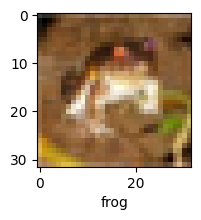

In [23]:
plot_sample(X_train, y_train, 0)

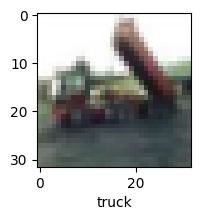

In [26]:
plot_sample(X_train, y_train, 2)

In [27]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [28]:
print(X_train[0].shape)

(32, 32, 3)


In [32]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32, 32, 3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 59s 35ms/step - loss: 1.8078 - accuracy: 0.3564
Epoch 2/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.6214 - accuracy: 0.4288
Epoch 3/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.5408 - accuracy: 0.4550
Epoch 4/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.4810 - accuracy: 0.4765
Epoch 5/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.4334 - accuracy: 0.4941


In [34]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 87s 53ms/step - loss: 1.3265 - accuracy: 0.5251
Epoch 2/5
1563/1563 [==============================] - 85s 54ms/step - loss: 0.9355 - accuracy: 0.6700
Epoch 3/5
1563/1563 [==============================] - 86s 55ms/step - loss: 0.7146 - accuracy: 0.7512
Epoch 4/5
1563/1563 [==============================] - 87s 56ms/step - loss: 0.5026 - accuracy: 0.8245
Epoch 5/5
1563/1563 [==============================] - 87s 56ms/step - loss: 0.3052 - accuracy: 0.8964


In [37]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.0102 - accuracy: 0.7127


[1.0101737976074219, 0.7127000093460083]

In [39]:
y_pred = cnn.predict(X_test)
print(y_pred[:5])

313/313 [==============================] - 3s 9ms/step
[[1.3717917e-04 1.3560739e-02 2.7956694e-02 7.2962528e-01 2.2914296e-02
  1.3219245e-01 5.9417758e-02 1.6381996e-03 1.2328594e-02 2.2873803e-04]
 [2.7928914e-05 9.7705054e-01 1.2952727e-12 3.9619543e-14 5.0509161e-14
  4.4648780e-15 2.7768385e-13 9.2785937e-15 2.2917777e-02 3.6832057e-06]
 [6.2769398e-02 2.8541429e-02 2.8953354e-03 1.0158356e-04 7.4327812e-03
  1.7754941e-05 1.5286781e-05 1.1423411e-03 6.4683664e-01 2.5024754e-01]
 [9.9786526e-01 5.2660553e-06 3.2186686e-05 1.1683555e-05 6.4120293e-05
  1.6806076e-10 2.6956104e-10 2.0199456e-08 2.0214038e-03 4.2703562e-08]
 [4.5203453e-08 4.7899088e-05 3.2588042e-02 2.3635540e-02 7.6246959e-01
  2.4747872e-03 1.7875312e-01 5.1065638e-07 2.9678944e-05 8.9244293e-07]]


In [40]:
y_classes = [np.argmax(i) for i in y_pred]
print(y_classes[:5])

[3, 1, 8, 0, 4]


In [41]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

'airplane'

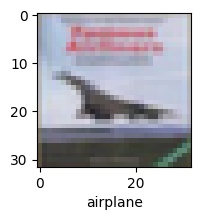

In [43]:
plot_sample(X_test, y_test,3)
classes[y_classes[3]]

'deer'

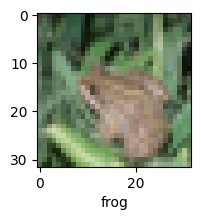

In [54]:
plot_sample(X_test, y_test,4)
classes[y_classes[4]]